# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [561]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import sys

# import my own libraries
sys.path.append('../myUtils')
import myGraph as myG
import text as myT

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

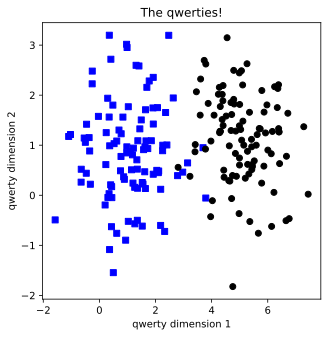

In [562]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

def noise():
    return np.random.randn(nPerClust)*blur

# generate data
a = [ A[0]+noise() , A[1]+noise() ]
b = [ B[0]+noise() , B[1]+noise() ]

# a =  [[ a a a a a a ],
#       [ a a a a a a ]]

# b =  [[ b b b b b b ],
#       [ b b b b b b ]]

# labels (0 for a, 1 for b) (2n x 1)
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

#   0 labels_np = [[ 0 ],
#   1              [ 0 ],
#                   ...
#  99              [ 0 ],
# 100              [ 1 ],
# 101              [ 1 ],
#                   ...
# 199              [ 1 ]]

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# data_np =  [[ a a a a a a ... b b b b b b ],
#             [ a a a a a a ... b b b b b b ]].T =
#
#           [[ a a ],
#            [ a a ],
#              ...
#            [ a a ],
#            [ b b ],
#            [ b b ],
#              ...
#            [ b b ]]

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
a_col0 = data[np.where(labels==0)[0],0]
a_col1 = data[np.where(labels==0)[0],1]
b_col0 = data[np.where(labels==1)[0],0]
b_col1 = data[np.where(labels==1)[0],1]

plt.plot(a_col0, a_col1,'bs')
plt.plot(b_col0, b_col1,'ko')

plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [563]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [564]:
# build the model
ANN_model = nn.Sequential(
    nn.Linear(2,8),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(8,16),   # output unit
    nn.ReLU(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
    nn.Linear(16,8),   # output unit
    nn.ReLU(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
    nn.Linear(8,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
)

ANN_model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
  (7): Sigmoid()
)

In [565]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()  # Binary Cross Entropy Loss
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=learningRate)  # Stochastic Gradient Descent

# parameters = w0 (bias), w1, w2
print('w0 = ',ANN_model[0].weight)
print('w1 = ',ANN_model[2].weight)
 


w0 =  Parameter containing:
tensor([[ 0.6056,  0.5746],
        [ 0.5333, -0.2054],
        [-0.6663, -0.6053],
        [-0.2457, -0.3210],
        [-0.0658,  0.5789],
        [-0.6722, -0.0037],
        [ 0.0193,  0.4752],
        [ 0.3485, -0.6673]], requires_grad=True)
w1 =  Parameter containing:
tensor([[-0.1284,  0.1799, -0.2278,  0.0481, -0.2400,  0.0033, -0.2689,  0.0455],
        [ 0.3526, -0.1423,  0.0474, -0.2870,  0.2077,  0.2254,  0.0760,  0.1741],
        [-0.2505, -0.0783, -0.1778, -0.3361,  0.1620, -0.1815, -0.0670, -0.1003],
        [ 0.0996, -0.1060, -0.2196, -0.3205, -0.1226, -0.0879, -0.3079,  0.1003],
        [-0.2618, -0.1646,  0.3232,  0.3384, -0.1344,  0.3507, -0.0090,  0.0114],
        [ 0.0508, -0.0669, -0.1961, -0.2629,  0.3083,  0.3146, -0.2253,  0.1630],
        [-0.1763, -0.0339,  0.1727,  0.0523, -0.1739,  0.0608,  0.3509,  0.2724],
        [-0.1192, -0.1479,  0.1454, -0.0307, -0.3129,  0.2590, -0.1801,  0.0394],
        [ 0.3156, -0.3443, -0.1143,  0.0776

In [566]:
# train the model
numepochs = 3000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANN_model(data) # compute the output for every input (forward pass)

  # compute loss
  loss = lossfun(yHat,labels) # compute the loss for every pair of output/label (forward pass)
  losses[epochi] = loss # save the loss for plotting

  # backprop
  optimizer.zero_grad() # reset the gradients from the previous iteration (otherwise they would be accumulated)
  loss.backward() # compute the gradients for every parameter (backward pass)
  optimizer.step() # take a step in the direction of the negative gradient (forward pass)

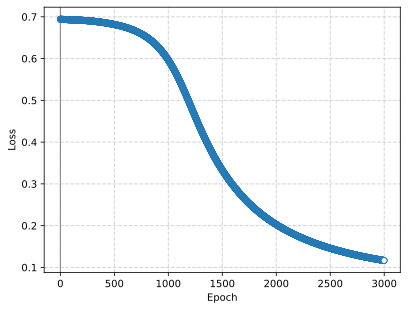

In [567]:
# show the losses

myG.showAxes(plt, grid=True, axis_x=False)
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [568]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANN_model(data) # predictions are in the range [0,1] bcause of the sigmoid activation

predlabels = predictions > .5  # convert to 0/1 labels Nx1: [[False], [False], ..., [True], [True], ...]

print(f'\npredictions[0:10]:\n{predictions[0:10]}')
print(f'\npredlabels[0:10]:\n{predlabels[0:10]}')
print(f'\nlabels[0:10]:\n{labels[0:10]}')

# find errors
misclassified = np.where(predlabels != labels)[0]  # find the misclassified points

print(f'\nmisclassified = {misclassified}')

print(f'\nNumber of misclassified points: {len(misclassified)}')

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print(f'\nFinal accuracy: {totalacc}%')



predictions[0:10]:
tensor([[0.0062],
        [0.0744],
        [0.0109],
        [0.0023],
        [0.0016],
        [0.0175],
        [0.0057],
        [0.0103],
        [0.0020],
        [0.0127]], grad_fn=<SliceBackward0>)

predlabels[0:10]:
tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

labels[0:10]:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

misclassified = [ 12  13  45 132]

Number of misclassified points: 4

Final accuracy: 98.0%


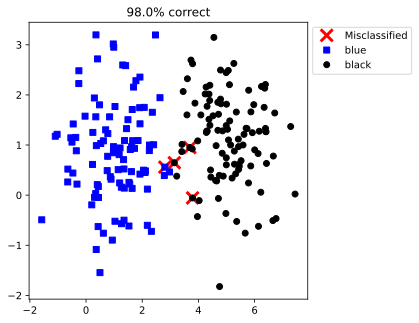

In [569]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

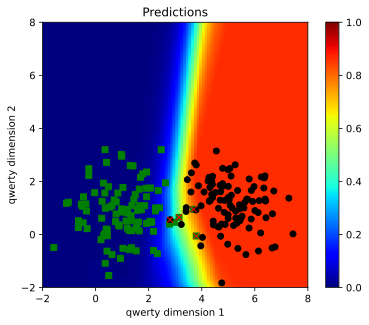

In [570]:
# plot the predictions in a heatmap
 
# create a grid of points
ngrid = 100
xgrid = np.linspace(-2,8,ngrid)
ygrid = np.linspace(-2,8,ngrid)
xv, yv = np.meshgrid(xgrid,ygrid)
 
# convert to a list of coordinates
xcoord = np.reshape(xv,(ngrid*ngrid,1))
ycoord = np.reshape(yv,(ngrid*ngrid,1))
xycoord = np.hstack((xcoord,ycoord))
 
# convert to a tensor
xycoordT = torch.tensor(xycoord).float()
 
# compute the predictions
with torch.no_grad():
  predictions = ANN_model(xycoordT)
   
# convert to numpy array
predictions_np = predictions.numpy()

# find errors
misclassified = np.where(predlabels != labels)[0]  # find the misclassified points
 
# reshape to 2D
predictions_grid = np.reshape(predictions_np,(ngrid,ngrid))

# plot the heatmap
plt.imshow(predictions_grid,extent=[-2,8,-2,8],origin='lower',cmap='jet', vmin=0, vmax=1) # other cmaps are 'jet', 'coolwarm', 'bwr', 'seismic', 'RdBu', 'binary', 'gray', 'bone', 'pink', 'hot', 'afmhot', 'gist_heat', 'copper', 'Wistia', 'autumn', 'summer', 'spring', 'cool', 'winter'
plt.colorbar()
plt.plot(a_col0, a_col1,'gs')
plt.plot(b_col0, b_col1,'ko')
plt.plot(data_np[misclassified,0],data_np[misclassified,1],'rx')
plt.title('Predictions')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


# Additional explorations

In [571]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
# 
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the 
#    qwerty-generating code to get the model to have 100% classification accuracy.
# 